<a href="https://colab.research.google.com/github/xthimylJ/daily-practice/blob/main/machine_learning_with_remudin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample = ["problem of evil", "evil queen", "horizen problem"]

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

# 20 October 2025: practicing validation

In [ ]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [ ]:
X, y

(array([[1.73907352e-01],
        [5.18867376e-01],
        [1.30815988e-08],
        [9.14049845e-02],
        [2.15372915e-02],
        [8.52641608e-03],
        [3.46928663e-02],
        [1.19412216e-01],
        [1.57424429e-01],
        [2.90323473e-01],
        [1.75724041e-01],
        [4.69525764e-01],
        [4.18007224e-02],
        [7.71090232e-01],
        [7.50080261e-04],
        [4.49526682e-01],
        [1.74143298e-01],
        [3.12134324e-01],
        [1.97084925e-02],
        [3.92442000e-02],
        [6.41191864e-01],
        [9.37530479e-01],
        [9.82347155e-02],
        [4.79310604e-01],
        [7.68057946e-01],
        [8.00321082e-01],
        [7.23251789e-03],
        [1.52527609e-03],
        [2.88423714e-02],
        [7.71134256e-01],
        [9.67209972e-03],
        [1.77331632e-01],
        [9.17552352e-01],
        [2.84265221e-01],
        [4.78693941e-01],
        [9.95501134e-02],
        [4.71283524e-01],
        [6.96600012e-01],
        [3.3

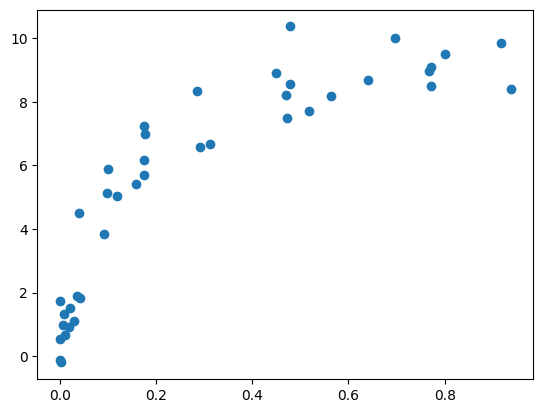

In [ ]:
plt.scatter(X,y)
#plt.plot()
plt.show()

## lets focus on cross-validation

Cross validation is an evaluation method to estimate how a chosen model performs on unseen data. It divides data into k-folds. Used for hyperparameter tuning and model selection.

Inside the blackbox, cross validation uses just an accuracy score to assess performance.


### hyperparameter tuning

In [ ]:
# let's choose a model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [ ]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None] # blayt' chosa huynya
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)

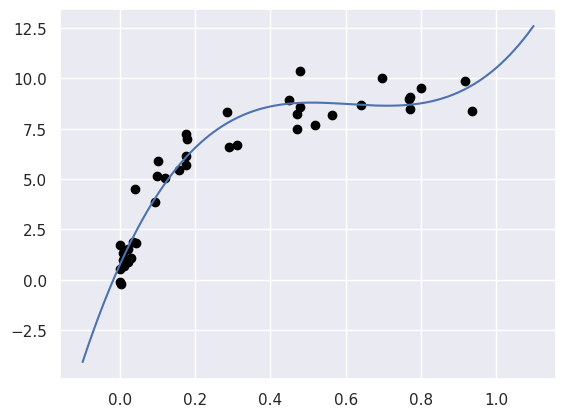

In [ ]:
import seaborn; seaborn.set()
plt.scatter(X.ravel(),y, color="black")
plt.plot(X_test.ravel(), y_test)
plt.show()

In [ ]:
degree3pol = PolynomialRegression(3)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(degree3pol, X, y, cv=5).mean()

np.float64(0.8725998913576125)

In [ ]:
# now let's check degree-4 polynomial
degree4pol = PolynomialRegression(4)
cross_val_score(degree4pol, X, y, cv=5).mean()

np.float64(0.8965214368864037)

### model selection

In [ ]:
# now, we can take a real dataset and test different models for classification for example
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [ ]:
X_bc = breast_cancer.data

y_bc = breast_cancer.target

In [ ]:
X_bc.dtype

dtype('float64')

*list of candidate models:*  
Logistic Regression → baseline

Random Forest / Gradient Boosting → for strong non-linear performance

SVM (RBF) → if you expect complex class boundaries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
model2 = make_pipeline(StandardScaler(), SVC())

score2 = cross_val_score(model2, X_bc, y_bc, cv=10).mean()
print(score2)

NameError: name 'StandardScaler' is not defined

In [ ]:
model3 = make_pipeline(StandardScaler(), RandomForestClassifier())
score3 = cross_val_score(model3, X_bc, y_bc, cv=10).mean()
print(score3)

In [ ]:
from sklearn.preprocessing import StandardScaler
model1 = make_pipeline(StandardScaler(), LogisticRegression())
score = cross_val_score(model1, X_bc, y_bc, cv=10).mean()
print(score)

# 23 october 2025

## Imputation of missing data

In [ ]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="median")
X1 = imp.fit_transform(X)
X1

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/__init__.py)

##

* iterative imputer

# 10 December

## Task 1: Logistic Regression vs. k-Nearest Neighbors (kNN)


=== Logistic Regression Metrics ===
ROC-AUC: 0.9699
PR-AUC (Average Precision): 0.8603
F1: 0.7125
Precision: 0.5758
Recall: 0.9344

=== kNN Metrics (best k = 30 ) ===
ROC-AUC: 0.9649
PR-AUC (Average Precision): 0.8499
F1: 0.6452
Precision: 0.9375
Recall: 0.4918


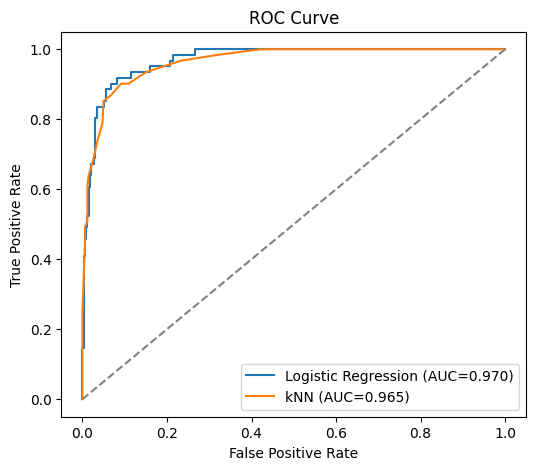

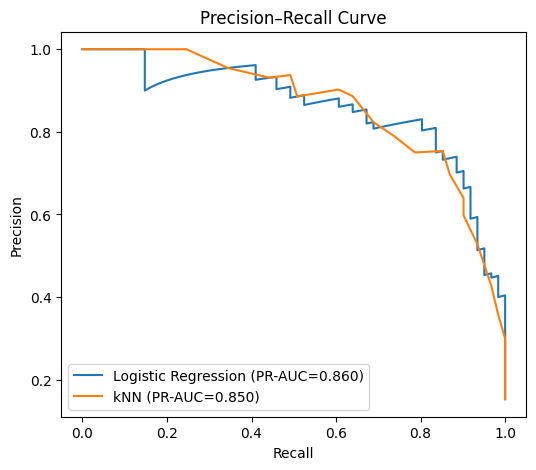

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    f1_score, precision_score, recall_score,
    roc_curve, precision_recall_curve
)

import matplotlib.pyplot as plt

# -------------------------
# 1. Load your dataset
# -------------------------
# Replace X, y with your values
# Example:
# X = df.drop("target", axis=1)
# y = df["target"]

# For demonstration, create synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    weights=[0.85, 0.15],     # 15% positive class → imbalance
    random_state=42
)

# -------------------------
# 2. Train/test split (stratified)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------
# 3. Logistic Regression Model
# -------------------------

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

log_reg.fit(X_train, y_train)

# Predictions & probabilities
lr_pred = log_reg.predict(X_test)
lr_proba = log_reg.predict_proba(X_test)[:, 1]


# -------------------------
# 4. kNN Model — tuning k using CV
# -------------------------

knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 31))  # try k from 1 to 30
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_knn = grid.best_estimator_

# Predictions & probabilities
knn_pred = best_knn.predict(X_test)
knn_proba = best_knn.predict_proba(X_test)[:, 1]


# -------------------------
# 5. Compute Metrics
# -------------------------

def evaluate(true, pred, proba):
    return {
        "ROC-AUC": roc_auc_score(true, proba),
        "PR-AUC (Average Precision)": average_precision_score(true, proba),
        "F1": f1_score(true, pred),
        "Precision": precision_score(true, pred),
        "Recall": recall_score(true, pred),
    }

lr_metrics = evaluate(y_test, lr_pred, lr_proba)
knn_metrics = evaluate(y_test, knn_pred, knn_proba)

print("\n=== Logistic Regression Metrics ===")
for k, v in lr_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== kNN Metrics (best k =", grid.best_params_["knn__n_neighbors"], ") ===")
for k, v in knn_metrics.items():
    print(f"{k}: {v:.4f}")


# -------------------------
# 6. ROC & PR curves
# -------------------------

# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={lr_metrics['ROC-AUC']:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"kNN (AUC={knn_metrics['ROC-AUC']:.3f})")
plt.plot([0, 1], [0, 1], '--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision–Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_proba)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_proba)

plt.figure(figsize=(6,5))
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (PR-AUC={lr_metrics['PR-AUC (Average Precision)']:.3f})")
plt.plot(recall_knn, precision_knn, label=f"kNN (PR-AUC={knn_metrics['PR-AUC (Average Precision)']:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()


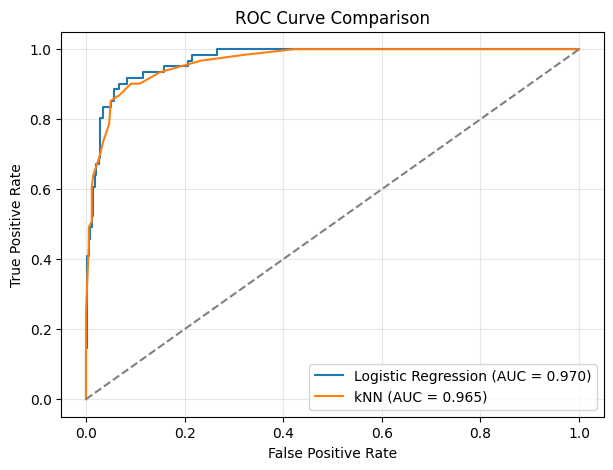

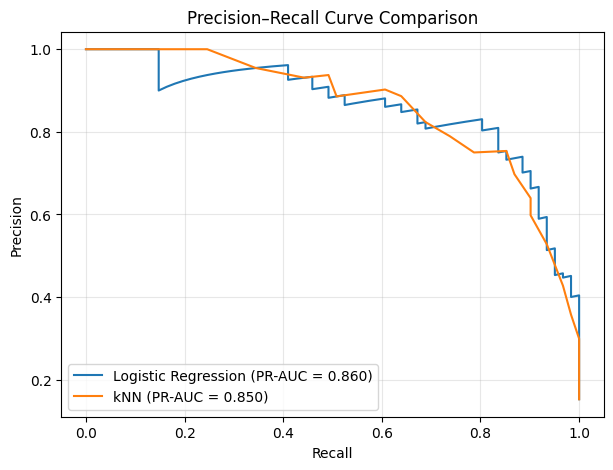

=== AUC Scores ===
Logistic Regression - ROC-AUC: 0.9699, PR-AUC: 0.8603
kNN - ROC-AUC: 0.9649, PR-AUC: 0.8499


In [ ]:
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt

# -------------------------
# 1. Compute ROC & AUC
# -------------------------

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
roc_auc_lr = roc_auc_score(y_test, lr_proba)

# kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
roc_auc_knn = roc_auc_score(y_test, knn_proba)

# -------------------------
# 2. Compute Precision-Recall & PR-AUC
# -------------------------

# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_proba)
pr_auc_lr = average_precision_score(y_test, lr_proba)

# kNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_proba)
pr_auc_knn = average_precision_score(y_test, knn_proba)

# -------------------------
# 3. Plot ROC curves
# -------------------------

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"kNN (AUC = {roc_auc_knn:.3f})")
plt.plot([0,1], [0,1], '--', color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -------------------------
# 4. Plot Precision–Recall curves
# -------------------------

plt.figure(figsize=(7,5))
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (PR-AUC = {pr_auc_lr:.3f})")
plt.plot(recall_knn, precision_knn, label=f"kNN (PR-AUC = {pr_auc_knn:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -------------------------
# 5. Print AUC values
# -------------------------

print("=== AUC Scores ===")
print(f"Logistic Regression - ROC-AUC: {roc_auc_lr:.4f}, PR-AUC: {pr_auc_lr:.4f}")
print(f"kNN - ROC-AUC: {roc_auc_knn:.4f}, PR-AUC: {pr_auc_knn:.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# --------------------------------------------------
# Helper function to sweep thresholds for ANY model
# --------------------------------------------------
def tune_thresholds(y_true, y_proba, fp_cost=1, fn_cost=1):
    thresholds = np.arange(0, 1.01, 0.01)

    results = []

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # expected cost = FP * cost_FP + FN * cost_FN
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        cost = FP * fp_cost + FN * fn_cost

        results.append((t, precision, recall, f1, cost))

    results = np.array(results, dtype=object)

    # Find thresholds:
    best_f1_idx = np.argmax(results[:, 3])     # f1 column
    best_cost_idx = np.argmin(results[:, 4])   # cost column

    best_f1_threshold = results[best_f1_idx]
    best_cost_threshold = results[best_cost_idx]

    return results, best_f1_threshold, best_cost_threshold


In [ ]:
lr_results, lr_best_f1, lr_best_cost = tune_thresholds(
    y_test, lr_proba,
    fp_cost=1,   # set your FP cost
    fn_cost=5    # set your FN cost (example: FN is more severe)
)

print("=== Logistic Regression: Best F1 Threshold ===")
print(f"Threshold: {lr_best_f1[0]:.2f}")
print(f"Precision: {lr_best_f1[1]:.3f}")
print(f"Recall:    {lr_best_f1[2]:.3f}")
print(f"F1 Score:  {lr_best_f1[3]:.3f}")

print("\n=== Logistic Regression: Minimum-Cost Threshold ===")
print(f"Threshold: {lr_best_cost[0]:.2f}")
print(f"Cost:      {lr_best_cost[4]:.3f}")
print(f"Precision: {lr_best_cost[1]:.3f}")
print(f"Recall:    {lr_best_cost[2]:.3f}")


=== Logistic Regression: Best F1 Threshold ===
Threshold: 0.81
Precision: 0.831
Recall:    0.803
F1 Score:  0.817

=== Logistic Regression: Minimum-Cost Threshold ===
Threshold: 0.61
Cost:      53.000
Precision: 0.667
Recall:    0.918


In [ ]:
knn_results, knn_best_f1, knn_best_cost = tune_thresholds(
    y_test, knn_proba,
    fp_cost=1,   # adjust if needed
    fn_cost=5
)

print("=== kNN: Best F1 Threshold ===")
print(f"Threshold: {knn_best_f1[0]:.2f}")
print(f"Precision: {knn_best_f1[1]:.3f}")
print(f"Recall:    {knn_best_f1[2]:.3f}")
print(f"F1 Score:  {knn_best_f1[3]:.3f}")

print("\n=== kNN: Minimum-Cost Threshold ===")
print(f"Threshold: {knn_best_cost[0]:.2f}")
print(f"Cost:      {knn_best_cost[4]:.3f}")
print(f"Precision: {knn_best_cost[1]:.3f}")
print(f"Recall:    {knn_best_cost[2]:.3f}")


=== kNN: Best F1 Threshold ===
Threshold: 0.27
Precision: 0.754
Recall:    0.852
F1 Score:  0.800

=== kNN: Minimum-Cost Threshold ===
Threshold: 0.21
Cost:      61.000
Precision: 0.640
Recall:    0.902


## Task 4

### A

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    f1_score, precision_score, recall_score
)

# ------------------------------------
# 1. Load your dataset (replace with your real data)
# ------------------------------------
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    weights=[0.85, 0.15],   # 15% minority class
    random_state=42
)

# ------------------------------------
# 2. Train/test split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------------
# Helper function for evaluation
# ------------------------------------
def evaluate(model_name, y_true, y_pred, y_proba):
    print(f"\n=== {model_name} ===")
    print(f"ROC-AUC:   {roc_auc_score(y_true, y_proba):.3f}")
    print(f"PR-AUC:    {average_precision_score(y_true, y_proba):.3f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")


# ===========================================================
# A. Logistic Regression WITHOUT class_weight
# ===========================================================

pipe_unweighted = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, class_weight=None))
])

pipe_unweighted.fit(X_train, y_train)

pred_unweighted = pipe_unweighted.predict(X_test)
proba_unweighted = pipe_unweighted.predict_proba(X_test)[:, 1]

evaluate("LogReg (No Class Weight)", y_test, pred_unweighted, proba_unweighted)


# ===========================================================
# B. Logistic Regression WITH class_weight="balanced"
# ===========================================================

pipe_weighted = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe_weighted.fit(X_train, y_train)

pred_weighted = pipe_weighted.predict(X_test)
proba_weighted = pipe_weighted.predict_proba(X_test)[:, 1]

evaluate("LogReg (class_weight='balanced')", y_test, pred_weighted, proba_weighted)



=== LogReg (No Class Weight) ===
ROC-AUC:   0.972
PR-AUC:    0.868
F1 Score:  0.797
Precision: 0.825
Recall:    0.770

=== LogReg (class_weight='balanced') ===
ROC-AUC:   0.970
PR-AUC:    0.860
F1 Score:  0.713
Precision: 0.576
Recall:    0.934


### B

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipe = Pipeline([
    ('smote', SMOTE()),
    ('model', KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors": [3, 5, 7, 9],
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring={
        "f1": "f1",
        "roc_auc": "roc_auc",
        "pr_auc": "average_precision"
    },
    refit="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("F1:", grid.cv_results_["mean_test_f1"][grid.best_index_])
print("ROC-AUC:", grid.cv_results_["mean_test_roc_auc"][grid.best_index_])
print("PR-AUC:", grid.cv_results_["mean_test_pr_auc"][grid.best_index_])


F1: 0.5980479939067047
ROC-AUC: 0.8956900680013703
PR-AUC: 0.5584673824184412
